# 0. Libraries and importing the data

In [2]:
import pandas as pd
import numpy as np

# Graphical tools
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

# Hyperparameter tuning and cross-validation
from sklearn.model_selection import RandomizedSearchCV

# For creating a pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline

# For preprocessing
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

# Classes for dealing with imbalanced datasets
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# Extracting scores for all classes
from sklearn.metrics import classification_report

# Utilities
from scipy.stats import uniform
from scipy.stats import randint
import copy

## Training and test datasets

In [3]:
dfv1 = pd.read_csv('2_preprocessed_datasets/v1_train.csv')
dfv1

,id,short_name,overall,potential,value_eur,wage_eur,height_cm,weight_kg,club_name,league_level,...,real_face_Yes,work_rate_High/High,work_rate_High/Low,work_rate_High/Medium,work_rate_Low/High,work_rate_Low/Low,work_rate_Low/Medium,work_rate_Medium/High,work_rate_Medium/Low,work_rate_Medium/Medium
0,216302,E. García,71,71,1400000.0,10000,176,73,Club Atlético de San Luis,1,...,False,False,False,False,False,False,False,True,False,False
1,237867,D. Cancola,65,71,1000000.0,2000,183,73,Ross County FC,1,...,False,False,False,False,False,False,False,False,False,True
2,253472,E. Kahl,65,77,1600000.0,2000,178,69,Aarhus GF,1,...,False,False,False,True,False,False,False,False,False,False
3,223994,S. Mugoša,72,72,2300000.0,5000,188,81,Incheon United FC,1,...,False,False,False,True,False,False,False,False,False,False
4,251635,A. Țigănașu,65,65,525000.0,3000,179,74,FC Botoşani,1,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6890,242007,C. Whelan,59,66,425000.0,2000,180,65,Carlisle United,4,...,False,False,False,False,False,False,False,False,False,True
6891,187961,Paulinho,83,83,28500000.0,61000,183,80,Al Ahli,1,...,True,True,False,False,False,False,False,False,False,False
6892,257234,Y. Hamache,70,80,3400000.0,6000,177,73,Boavista FC,1,...,False,False,False,True,False,False,False,False,False,False
6893,232511,S. Sasaki,71,71,1300000.0,7000,176,70,Sanfrecce Hiroshima,1,...,False,False,False,False,False,False,False,True,False,False


In [4]:
dftv1 = pd.read_csv('2_preprocessed_datasets/v1_test.csv')
dftv1

,id,short_name,overall,potential,value_eur,wage_eur,height_cm,weight_kg,club_name,league_level,...,real_face_Yes,work_rate_High/High,work_rate_High/Low,work_rate_High/Medium,work_rate_Low/High,work_rate_Low/Low,work_rate_Low/Medium,work_rate_Medium/High,work_rate_Medium/Low,work_rate_Medium/Medium
0,215562,R. Hunt,63,63,475000.0,3000,171,67,Swindon Town,4,...,False,False,False,True,False,False,False,False,False,False
1,248311,Tiri,64,64,500000.0,950,186,84,ATK Mohun Bagan FC,1,...,False,False,False,False,False,False,False,False,False,True
2,223933,G. Nilsson,64,70,925000.0,2000,197,87,SV Wehen Wiesbaden,3,...,False,False,False,False,False,False,False,False,False,True
3,232546,D. Zabala,72,72,2300000.0,13000,172,64,Rosario Central,1,...,False,False,False,True,False,False,False,False,False,False
4,189217,P. Pawlett,63,63,450000.0,2000,178,68,Dundee United,1,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,205601,C. Atsu,72,72,2300000.0,17000,165,65,Al Raed,1,...,True,False,False,False,False,False,False,False,True,False
763,223752,M. Torres,68,74,1700000.0,2000,180,70,América de Cali,1,...,False,False,False,False,True,False,False,False,False,False
764,192450,A. Cook,65,65,700000.0,6000,185,80,Bradford City,4,...,False,False,False,False,False,True,False,False,False,False
765,192366,N. Otamendi,81,81,12500000.0,18000,183,76,SL Benfica,1,...,True,False,False,False,False,False,False,True,False,False


## Lists of features

### Limited

In [5]:
# List of numerical features (22 in total)
numerical_features = [
    'height_cm', 'weight_kg',
    'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
    'skill_curve', 'skill_long_passing','movement_acceleration', 'power_strength', 'power_long_shots',
    'mentality_interceptions', 'mentality_penalties', 'defending_marking_awareness', 
    'value_eur', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 
    'physic', 'age', 'height_weight_ratio'
]

# List of categorical ordinal features (3 in total)
categorical_ordinal_features = [
    'weak_foot', 'skill_moves', 'international_reputation'
]

# List of categorical nominal features (11 in total)
categorical_nominal_features_all_dummies = [
    'preferred_foot_Right',	
    'preferred_foot_Left', 'work_rate_High/High', 'work_rate_High/Low', 'work_rate_High/Medium',
    'work_rate_Low/High', 'work_rate_Low/Low', 'work_rate_Low/Medium',
    'work_rate_Medium/High', 'work_rate_Medium/Low',
    'work_rate_Medium/Medium'
]

# List of categorical nominal features (9 in total)
categorical_nominal_features = [
    'preferred_foot_Right',	'work_rate_High/Low', 'work_rate_High/Medium',
    'work_rate_Low/High', 'work_rate_Low/Low', 'work_rate_Low/Medium',
    'work_rate_Medium/High', 'work_rate_Medium/Low',
    'work_rate_Medium/Medium'
]

# Complete list of categorical features (with all dummies, for decision trees) (36 features)
categorical_features_all_dummies = categorical_nominal_features_all_dummies + categorical_ordinal_features

# Complete list of categorical features (with k-1 dummies, for KNN and logistic regresion) (34 features)
categorical_features = categorical_nominal_features + categorical_ordinal_features

### Extended

In [9]:
# List of numerical features
numerical_features_ext = [
    'overall', 'potential', 'wage_eur', 'height_cm', 'weight_kg',
    'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys',
    'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
    'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance',
    'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
    'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure',
    'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle',
    'value_eur', 'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 
    'physic', 'age', 'height_weight_ratio'
]

# List of categorical ordinal features 
categorical_ordinal_features_ext = [
    'league_level', 'weak_foot', 'skill_moves', 'international_reputation'
]

# List of categorical nominal features
categorical_nominal_features_ext_all_dummies = [
    'club_jersey_number', 'preferred_foot_Right',	
    'preferred_foot_Left',
    'work_rate_High/High', 'work_rate_High/Low', 'work_rate_High/Medium',
    'work_rate_Low/High', 'work_rate_Low/Low', 'work_rate_Low/Medium',
    'work_rate_Medium/High', 'work_rate_Medium/Low',
    'work_rate_Medium/Medium',
]

categorical_nominal_features_ext = [
    'club_jersey_number',
    'preferred_foot_Left',
    'work_rate_High/Low', 'work_rate_High/Medium',
    'work_rate_Low/High', 'work_rate_Low/Low', 'work_rate_Low/Medium',
    'work_rate_Medium/High', 'work_rate_Medium/Low',
    'work_rate_Medium/Medium',
]


# Complete list of categorical features
categorical_features_all_dummies_ext = categorical_nominal_features_ext_all_dummies + categorical_ordinal_features_ext
categorical_features_ext = categorical_nominal_features_ext + categorical_ordinal_features_ext

# 4. Training of the final model
Once the best features are selected, we can train the model with the full dataset, and without splitting the data (as we will have considered potential overfitting already in the feature selection step).After performing feature selection through regularization methods like Lasso or Ridge, the next step depends on your objective:
- Using the selected features:
    - The typical next step is to train a new linear regression model (without regularization) using the entire dataset but only the features that were selected (non-zero coefficients) by Lasso or Ridge. This approach ensures that the model uses the most relevant features, as identified by the regularization process, while potentially improving interpretability and performance.
    - This is recommended because Lasso and Ridge modify the coefficients by shrinking them, and you might want to get a better estimate of the coefficients on the unpenalized model, now that you know which features are most important.
- Using the regularized model's coefficients:
    - Alternatively, you could keep the coefficients from the best-performing Lasso or Ridge model directly and use them. This is useful if you want to retain the regularization benefits to control overfitting or maintain stability when dealing with collinearity.

In summary, the more common practice is to retrain the linear regression on the selected features without regularization, but keeping the Lasso or Ridge model is also valid if you need the benefits of regularization. For example, see the pipeline of cross-validation suggested by scikit-learn (https://scikit-learn.org/stable/modules/cross_validation.html#multimetric-cross-validation):
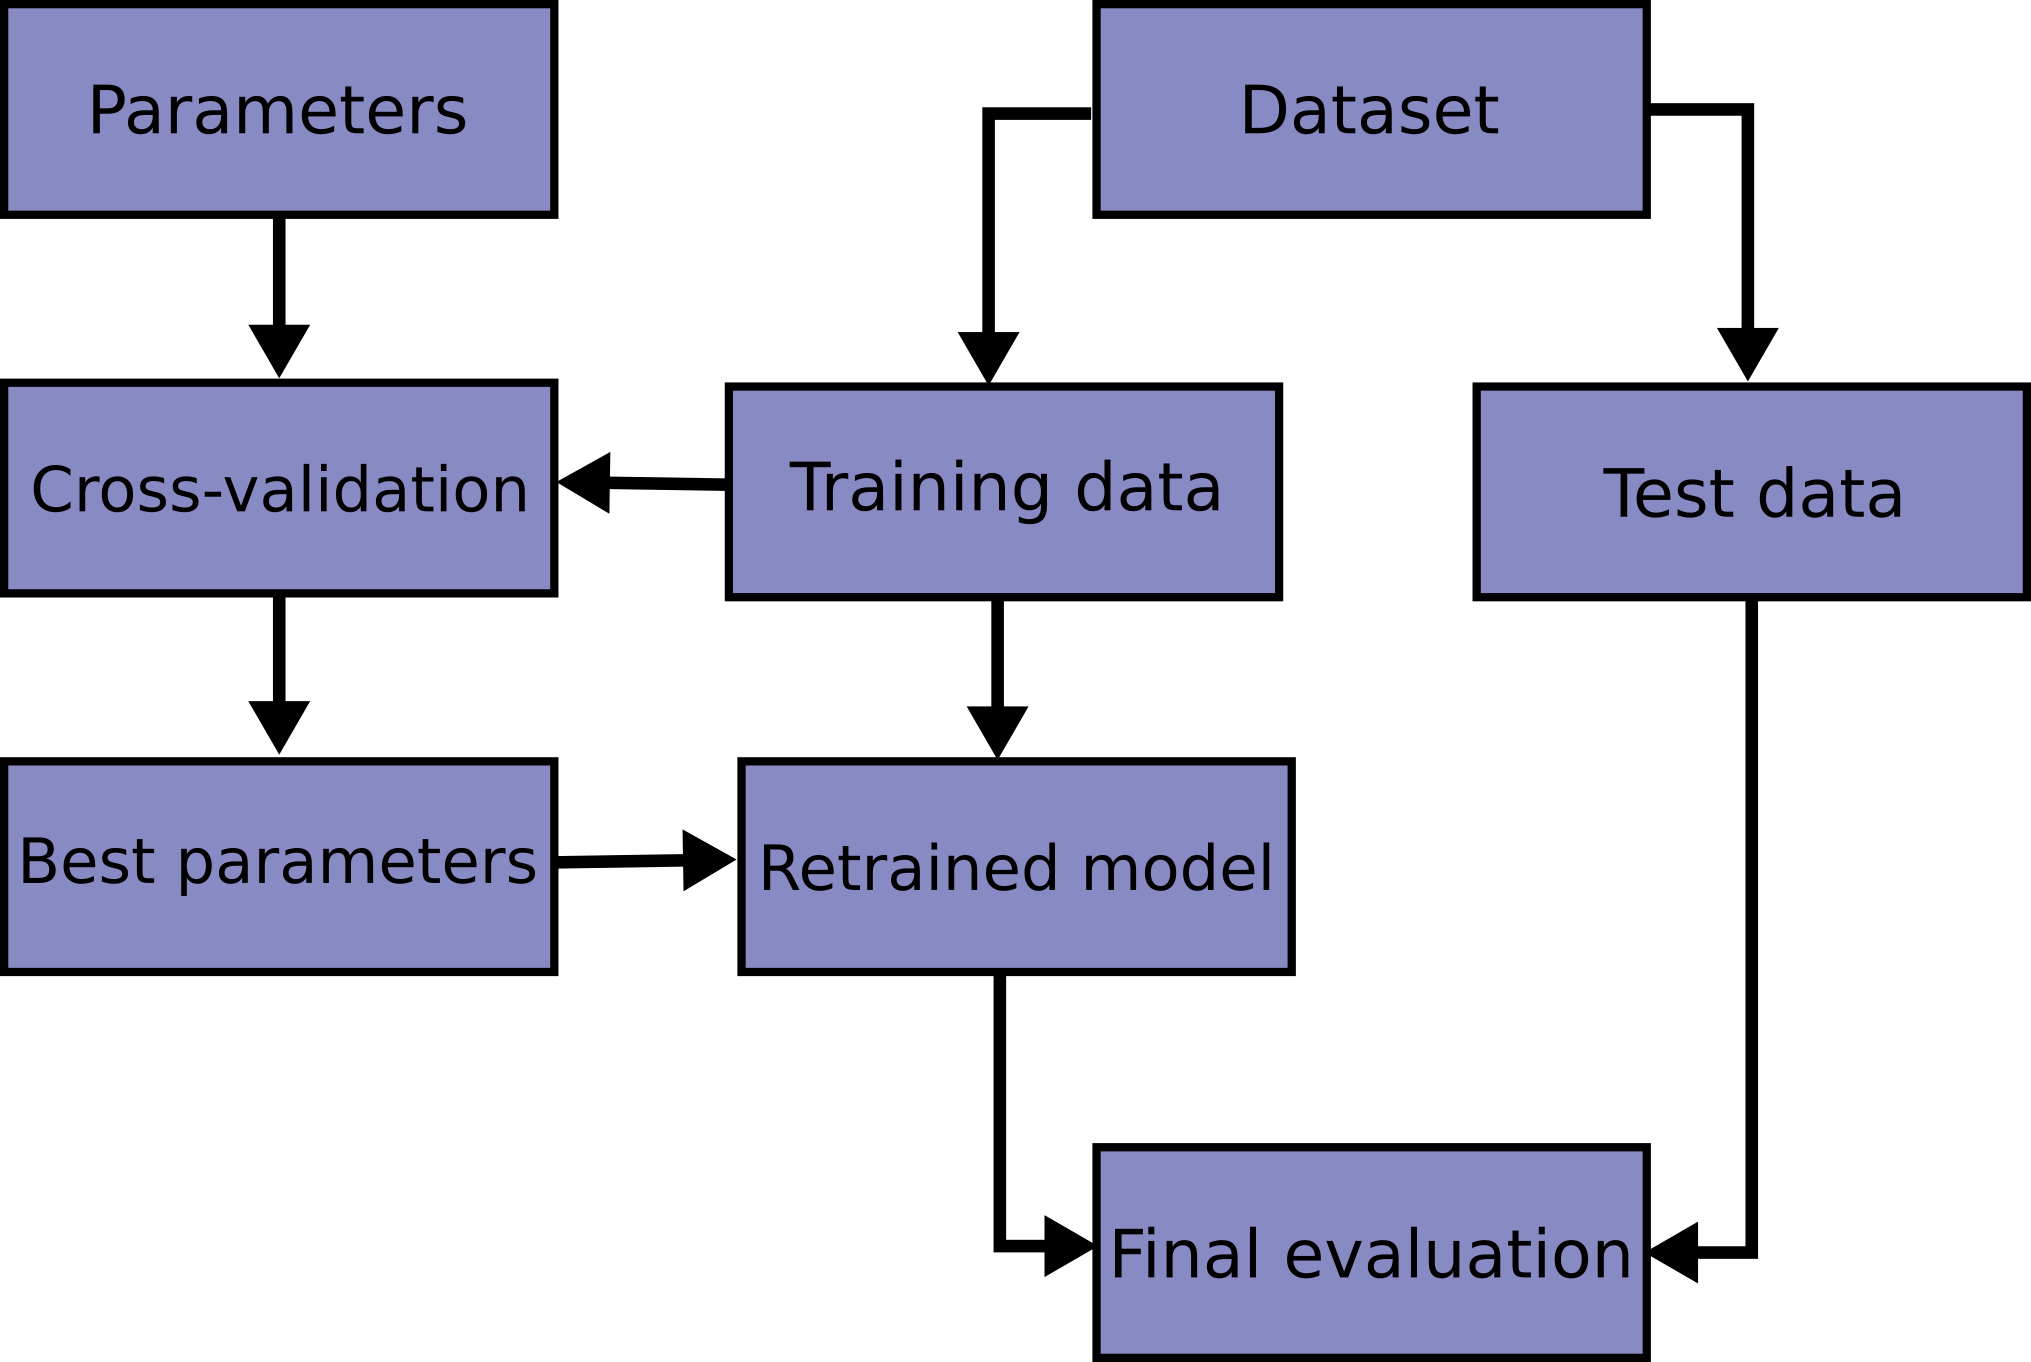

## Training function for baseline models

In [ ]:
def train_predict_baseline_models(
        df_train: pd.DataFrame, df_test: pd.DataFrame, numerical_features: list[str], categorical_features: list[str], 
        model, hyperparam_dict: dict, ada_boost: bool = False, num_imputer: str = "median", resampling_method: str = 'none'
):
    
    """
    Function to train (with the whole training dataset) and make predictions on 
    the test dataset with the optimal hyperparameters that have been found in the
    feature selection and evaluation step. It preprocesses numerical and 
    categorical features, performs model fitting, and creates a .csv for submitting
    the prediction in Kaggle. Goalkeeper (GK) players are handled separately with 
    special assumptions based on the missing 'pace' feature. Additionally, it 
    supports handling of class imbalance through various resampling methods 
    (oversampling, undersampling, SMOTE).

    Parameters:
    -----------
    df_train : pd.DataFrame
        The input training dataset containing both numerical and categorical features as well as the target variable.
    
    df_test : pd.DataFrame
        The input test dataset containing both numerical and categorical features as well as the target variable.

    numerical_features : list[str]
        List of column names representing numerical features in the dataset.

    categorical_features : list[str]
        List of column names representing categorical features in the dataset.
        
    model : class
        The model class to be used for training and evaluation (LogisticRegression, KNeighborsClassifier,
        DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier, LGBMClassifier).
        
    hyperparam_dict : dict
        Dictionary with the optimal hyperparameters found in the hyperparameter-tuning step through RandomizedSearchCV.
    
    ada_boost : bool, default = False
        Implement adaptive boosting (can only be applied to decision trees).  
        
    resampling_method : str, default='none'
        Method used to address class imbalance:
        - 'oversample' for RandomOverSampler
        - 'undersample' for RandomUnderSampler
        - 'smote' for SMOTE (Synthetic Minority Over-sampling Technique)
        - 'none' for no resampling.

    Returns:
    --------
    test_predictions_submit : pd.DataFrame
        DataFrame containing the predicted positions for the test dataset. This dataset is also saved as a .csv in the folder "3_predictions/".

    """

    ###########################################################################

    # First, we create the pipeline for preprocessing numerical and categorical transformers

    # For numerical variables, we do median imputation
    num_prepr = [
        ("imputer", SimpleImputer(strategy = num_imputer))
    ]

    # We add standardization for certain models that benefit from it (and to SMOTE)
    if model == LogisticRegression or model == KNeighborsClassifier or resampling_method == 'smote':
        num_prepr.append(("standardize", StandardScaler()))

    # For categorical variables, for now, we don't do anything (pass through)
    cat_prepr = [
        ("passthrough", "passthrough")
    ]

    # Create the ColumnTransformer to apply different transformations to numerical
    # and categorical variables
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', Pipeline(num_prepr), numerical_features),
            ('cat', Pipeline(cat_prepr), categorical_features),
        ]
    )

    # Create steps of the pipeline, which begins with the preprocessor. 
    steps = [('preprocessor', preprocessor)]

    ###########################################################################

    # Second, we add the resampling step based on the chosen method (resampling after 
    # preprocessing and feature engineering)
    if resampling_method == 'oversample':
        resampling = RandomOverSampler(sampling_strategy = 'auto', random_state=17)
    elif resampling_method == 'undersample':
        resampling = RandomUnderSampler(sampling_strategy = 'auto', random_state=17)
    elif resampling_method == 'smote':
        resampling = SMOTE(sampling_strategy = 'auto', random_state=17)
    elif resampling_method == 'none':
        resampling = None  # No resampling
    else:
        raise ValueError('Invalid resampling type. Insert resampling method "oversample", "undersample", "smote" or "none" for no resampling.')

    if resampling:
        steps.append(('resampling', resampling))

    ###########################################################################

    # Third, depending on the model that has been chosen, we append one model
    # or another, and define the set of hyperparameters accordingly

    # We check if the model is one of the allowed model classes
    allowed_models = (LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier,
                      RandomForestClassifier, GradientBoostingClassifier, LGBMClassifier)

    if ada_boost == False:

        if model == LogisticRegression:
            steps.append(('logreg', 
                                    OneVsRestClassifier(model( # With OVR, we make each class a binary problem (one-versus-the-rest)
                                    fit_intercept = True,
                                    max_iter = 2000,
                                    penalty = 'l2', # Ridge regularization
                                    class_weight = None,
                                    # We add the parameters that have been optimized in the same order as in the training and evaluation function (note that they are returned in alphabetical order)
                                    C = list(hyperparam_dict.values())[0]
                                    ))))

        elif model == KNeighborsClassifier:
            steps.append(('knn', 
                        model(
                            # We add the parameters that have been optimized in the same order as they are in the output of the training and evaluation function
                            n_neighbors = list(hyperparam_dict.values())[0],
                            weights = list(hyperparam_dict.values())[1]
                        )))
        
        elif model == DecisionTreeClassifier:
            steps.append(('dtc', 
                                    model(
                                    random_state = 17,
                                    class_weight = None,
                                    # We add the parameters that have been optimized in the same order as they are in the output of the training and evaluation function
                                    max_depth = list(hyperparam_dict.values())[0],
                                    max_features = list(hyperparam_dict.values())[1],
                                    max_leaf_nodes = list(hyperparam_dict.values())[2],
                                    min_samples_leaf = list(hyperparam_dict.values())[3],
                                    min_samples_split = list(hyperparam_dict.values())[4]
                                    )))
        
        elif model == RandomForestClassifier:
            steps.append(('rfc', 
                                    model(
                                    n_estimators = 1000,
                                    random_state = 17,
                                    oob_score = False,
                                    class_weight = None,
                                    n_jobs = -1,
                                    # We add the parameters that have been optimized in the same order as they are in the output of the training and evaluation function
                                    max_depth = list(hyperparam_dict.values())[0],
                                    max_features = list(hyperparam_dict.values())[1],
                                    max_leaf_nodes = list(hyperparam_dict.values())[2],
                                    min_samples_leaf = list(hyperparam_dict.values())[3],
                                    min_samples_split = list(hyperparam_dict.values())[4]
                                    )))
        
        elif model == GradientBoostingClassifier:
            steps.append(('gbc', 
                        model(
                            loss = 'log_loss',
                            random_state=17,
                            learning_rate = list(hyperparam_dict.values())[0],
                            max_depth = list(hyperparam_dict.values())[1],
                            max_features = list(hyperparam_dict.values())[2],
                            max_leaf_nodes = list(hyperparam_dict.values())[3],
                            min_samples_leaf = list(hyperparam_dict.values())[4],
                            min_samples_split = list(hyperparam_dict.values())[5],
                            n_estimators = list(hyperparam_dict.values())[6],
                            subsample = list(hyperparam_dict.values())[7]
                        )))

        elif model == LGBMClassifier:
            steps.append(('lgb',
                        model(
                            objective = 'multiclass',
                            n_estimators = 100, # Number of boosting iterations (since LightGBM uses decision trees as the learners, this can also be thought of as “number of trees”. Same as n_estimators)
                            max_depth = -1, # No limit max_depth (default), set to this value as LightGBM focuses on leaf-wise tree growth algorithm
                            subsample = 1.0,  # In each iteration, train with all the training instances (since we already do CV)
                            device_type = 'cpu', # Change this parameter if prefer CPU to run the algorithm over GPU (though, since the dataset is small, in this case CPU might perform better)
                            verbosity = -1, # We disable all the information except for fatal messages
                            boosting_type = list(hyperparam_dict.values())[0],
                            feature_fraction = list(hyperparam_dict.values())[1],
                            learning_rate = list(hyperparam_dict.values())[2],
                            min_child_samples = list(hyperparam_dict.values())[3],
                            min_split_gain = list(hyperparam_dict.values())[4],
                            num_leaves = list(hyperparam_dict.values())[5],
                            reg_lambda = list(hyperparam_dict.values())[6]
                    )))

        else:
            raise ValueError(f"Invalid model type. Allowed models are: {allowed_models}")

    else:
        if model == DecisionTreeClassifier:
            base_estimator = model(
                random_state = 17,
                class_weight = None,
                max_depth = list(hyperparam_dict.values())[0],
                max_features = list(hyperparam_dict.values())[1],
                max_leaf_nodes = list(hyperparam_dict.values())[2],
                min_samples_leaf = list(hyperparam_dict.values())[3],
                min_samples_split = list(hyperparam_dict.values())[4]
            )
            ada_boost = AdaBoostClassifier(
                estimator = base_estimator,
                algorithm = 'SAMME',
                random_state = 17,
                learning_rate = list(hyperparam_dict.values())[5],
                n_estimators = list(hyperparam_dict.values())[6]
            )
            steps.append(('adaboost', ada_boost))

        else:
            raise ValueError("Only Decision Trees are allowed for AdaBoost (Random Forests are not due to use of computing resources).")
    
    ###########################################################################

    # Fourth, we create the pipeline with the preprocessing, resampling and the model
    pipeline = ImbPipeline(steps) # We use Pipeline from imblearn instead of sklearn's

    ###########################################################################

    # Fifth, we split the dataset into goalkeepers and non-goalkeepers: those
    # with missing values in the "pace" variable are assumed to be GKs (which
    # is true according to what was found in the EDA)

    # For the training data

    df_gk = df_train[df_train['pace'].isna()].copy()
    df_nongk = df_train[~df_train['pace'].isna()].copy()

    X_nongk = df_nongk[numerical_features + categorical_features]
    y_nongk = df_nongk['position']

    # For the test data, we do apply the same separation
    # Prepare the test data (separate goalkeepers and non-goalkeepers)

    df_test_gk = df_test[df_test['pace'].isna()].copy()
    df_test_nongk = df_test[~df_test['pace'].isna()].copy()

    X_test_nongk = df_test_nongk[numerical_features + categorical_features]

    ###########################################################################

    # Sixth, we fit the pipeline on the non-goalkeeper data
    
    # Fit the pipeline on the non-goalkeeper data
    pipeline.fit(X_nongk, y_nongk)

    ###########################################################################

    # Seventh, we make the prediction (separately for goalkeepers and non-GK)

    # Predict for the non-goalkeepers in the test dataset
    test_predictions_nongk = pipeline.predict(X_test_nongk)

    # Handle goalkeepers by assigning them the 'GK' label
    test_predictions_gk = ['GK'] * len(df_test_gk)

    # Combine the predictions into a single DataFrame
    test_predictions_combined = pd.concat([
        pd.Series(test_predictions_nongk, name = 'position'),
        pd.Series(test_predictions_gk, name = 'position')
    ], axis=0, ignore_index=True)

    ###########################################################################

    # Eigth, we prepare the dataset for submission

    # Combine the IDs for the submission
    test_predictions_submit = pd.DataFrame({"id": pd.concat([df_test_nongk["id"], df_test_gk["id"]], axis=0, ignore_index=True), 
                                            "position": test_predictions_combined})

    # Save the submission file
    test_predictions_submit.to_csv("3_predictions/test_predictions_submit.csv", index=False)

    print("Submission file created")

    # We return the submission data frame if we want to check that everything is all right

    return test_predictions_submit

## KNN predictions

### No resampling, limited list of features

In [37]:
optimal_params_knn = {'knn__n_neighbors': 21, 'knn__weights': 'distance'}

predictions_logreg_nr = train_predict_baseline_models(
    df_train = dfv1, df_test = dftv1, numerical_features = numerical_features, 
    categorical_features = categorical_features, model = KNeighborsClassifier, 
    hyperparam_dict = optimal_params_knn, num_imputer = "median", 
    resampling_method = 'none')

Submission file created


F1 score of: 0.42297.

## Logistic regression predictions

### No resampling

#### Limited list of features, C = 6.534186154656548

In [ ]:
optimal_params_logreg = {
    'logreg__estimator__C': 6.534186154656548
}

predictions_logreg_nr = train_predict_baseline_models(
    df_train = dfv1, df_test = dftv1, numerical_features = numerical_features, 
    categorical_features = categorical_features, model = LogisticRegression, 
    hyperparam_dict = optimal_params_logreg, num_imputer = "median", 
    resampling_method = 'none')

Submission file created


F1 score of: 0.48302.

#### Limited list of features, C = 0.4006291618886648

In [ ]:
optimal_params_logreg = {
    'logreg__estimator__C': 0.4006291618886648
}

predictions_logreg_nr_2 = train_predict_baseline_models(
    df_train = dfv1, df_test = dftv1, numerical_features = numerical_features, 
    categorical_features = categorical_features, model = LogisticRegression, 
    hyperparam_dict = optimal_params_logreg, num_imputer = "median", 
    resampling_method = 'none')

Best Kaggle result yet (but almost "by pure chance")! F1 score of: 0.49347.

#### Limited list of features, C = 8.88982434157199

In [ ]:
optimal_params_logreg = {
    'logreg__estimator__C': 8.88982434157199
}

predictions_logreg_nr_3 = train_predict_baseline_models(
    df_train = dfv1, df_test = dftv1, numerical_features = numerical_features, 
    categorical_features = categorical_features, model = LogisticRegression, 
    hyperparam_dict = optimal_params_logreg, num_imputer = "median", 
    resampling_method = 'none')

F1 score of: 0.48302.

#### Limited list of features, C = 0.1
I have tried, arbitrarily, this penalty value for the logistic regression (where a lower value means a higher penalty). If the F1-score for this C is greater than for C = 0.4006291618886648, it will mean that we were overfitting the training dataset, so a higher penalty (i.e., more features with coefficients close to 0) leads to a better result.

In [ ]:
optimal_params_logreg = {
    'logreg__estimator__C': 0.1
}

predictions_logreg_nr_4 = train_predict_baseline_models(
    df_train = dfv1, df_test = dftv1, numerical_features = numerical_features, 
    categorical_features = categorical_features, model = LogisticRegression, 
    hyperparam_dict = optimal_params_logreg, num_imputer = "median", 
    resampling_method = 'none')

Submission file created


F1 score of: 0.49086. Therefore, it seems that a larger (lower) penalty was more optimal.

#### Extended list of features, C = 8.65042103546211

In [ ]:
optimal_params_logreg = {
    'logreg__estimator__C': 8.65042103546211
}

predictions_logreg_nr_ext = train_predict_baseline_models(
    df_train = dfv1, df_test = dftv1, numerical_features = numerical_features_ext, 
    categorical_features = categorical_features_ext, model = LogisticRegression, 
    hyperparam_dict = optimal_params_logreg, num_imputer = "median", 
    resampling_method = 'none')

F1 score of: 0.46997.

#### Limited list of features, C = 0.1669619295094371 (found with best F1-micro)

In [8]:
optimal_params_logreg = {
    'logreg__estimator__C': 0.1669619295094371
}

predictions_logreg_nr_5 = train_predict_baseline_models(
    df_train = dfv1, df_test = dftv1, numerical_features = numerical_features, 
    categorical_features = categorical_features, model = LogisticRegression, 
    hyperparam_dict = optimal_params_logreg, num_imputer = "median", 
    resampling_method = 'none')

Submission file created


Best Kaggle result yet! F1 score of: 0.49347. So, definitely, **the F1-score it is considering is the F1-micro**.

### Resampling

#### Oversampling, limited list of features, C = 0.4006291618886648

In [34]:
optimal_params_logreg = {
    'logreg__estimator__C': 0.4006291618886648
}

predictions_logreg_over = train_predict_baseline_models(
    df_train = dfv1, df_test = dftv1, numerical_features = numerical_features, 
    categorical_features = categorical_features, model = LogisticRegression, 
    hyperparam_dict = optimal_params_logreg, num_imputer = "median", 
    resampling_method = 'oversample')

Submission file created


F1 score of: 0.38381.

#### Undersampling, limited list of features, C = 0.6890035819129137

In [36]:
optimal_params_logreg = {
    'logreg__estimator__C': 0.6890035819129137
}

predictions_logreg_under = train_predict_baseline_models(
    df_train = dfv1, df_test = dftv1, numerical_features = numerical_features, 
    categorical_features = categorical_features, model = LogisticRegression, 
    hyperparam_dict = optimal_params_logreg, num_imputer = "median", 
    resampling_method = 'undersample')

Submission file created


F1 score of: 0.37859.

## Random forest predictions

### No resampling, limited list of features

In [30]:
optimal_params_rf = {'rfc__max_depth': 148,
 'rfc__max_features': 24,
 'rfc__max_leaf_nodes': 1244,
 'rfc__min_samples_leaf': 0.0013015285199047416,
 'rfc__min_samples_split': 0.010912693744184222}

predictions_rf_nr = train_predict_baseline_models(
    df_train = dfv1, df_test = dftv1, numerical_features = numerical_features, 
    categorical_features = categorical_features_all_dummies, model = RandomForestClassifier, 
    hyperparam_dict = optimal_params_rf, num_imputer = "median", 
    resampling_method = 'none')

Submission file created


F1 score of: 0.46475.

### Oversampling, limited list of features

In [31]:
optimal_params_rf = {'rfc__max_depth': 148,
 'rfc__max_features': 24,
 'rfc__max_leaf_nodes': 1244,
 'rfc__min_samples_leaf': 0.0013015285199047416,
 'rfc__min_samples_split': 0.010912693744184222}

predictions_rf_over = train_predict_baseline_models(
    df_train = dfv1, df_test = dftv1, numerical_features = numerical_features, 
    categorical_features = categorical_features_all_dummies, model = RandomForestClassifier, 
    hyperparam_dict = optimal_params_rf, num_imputer = "median", 
    resampling_method = 'oversample')

Submission file created


F1 score of: 0.34986.

### SMOTE, limited list of features

In [32]:
optimal_params_rf = {'rfc__max_depth': 148,
 'rfc__max_features': 24,
 'rfc__max_leaf_nodes': 1244,
 'rfc__min_samples_leaf': 0.0013015285199047416,
 'rfc__min_samples_split': 0.010912693744184222}

predictions_rf_over = train_predict_baseline_models(
    df_train = dfv1, df_test = dftv1, numerical_features = numerical_features, 
    categorical_features = categorical_features_all_dummies, model = RandomForestClassifier, 
    hyperparam_dict = optimal_params_rf, num_imputer = "median", 
    resampling_method = 'smote')

Submission file created


F1 score of: 0.37075.

### Undersampling, limited list of features

In [33]:
optimal_params_rf = {'rfc__max_depth': 48,
 'rfc__max_features': 7,
 'rfc__max_leaf_nodes': 3096,
 'rfc__min_samples_leaf': 0.0022275055277347616,
 'rfc__min_samples_split': 0.039801263866007214}

predictions_rf_over = train_predict_baseline_models(
    df_train = dfv1, df_test = dftv1, numerical_features = numerical_features, 
    categorical_features = categorical_features_all_dummies, model = RandomForestClassifier, 
    hyperparam_dict = optimal_params_rf, num_imputer = "median", 
    resampling_method = 'undersample')

Submission file created


F1 score of: 0.42036.

## Decision Tree predictions

### No resampling, limited list of features, with adaptive boosting

In [9]:
optimal_params_dt = {'adaboost__estimator__max_depth': 31,
 'adaboost__estimator__max_features': 10,
 'adaboost__estimator__max_leaf_nodes': 4945,
 'adaboost__estimator__min_samples_leaf': 0.033785596409893315,
 'adaboost__estimator__min_samples_split': 0.15685639533910706,
 'adaboost__learning_rate': 0.1,
 'adaboost__n_estimators': 100}

predictions_rf_dt_adaboost = train_predict_baseline_models(
    df_train = dfv1, df_test = dftv1, numerical_features = numerical_features, 
    categorical_features = categorical_features_all_dummies, model = DecisionTreeClassifier, 
    hyperparam_dict = optimal_params_dt, ada_boost = True, num_imputer = "median", 
    resampling_method = 'none')

Submission file created


F1 score of: 0.46997 (third-best after logistic regression with no oversampling).

## Gradient Boosting predictions

### No resampling, limited list of features

In [ ]:
optimal_params_gb = {'gbc__learning_rate': 0.1,
 'gbc__max_depth': 51,
 'gbc__max_features': 23,
 'gbc__max_leaf_nodes': 2141,
 'gbc__min_samples_leaf': 0.18017515564585876,
 'gbc__min_samples_split': 0.13294085911713252,
 'gbc__n_estimators': 100,
 'gbc__subsample': 0.8317908278120589}

predictions_gboost = train_predict_baseline_models(
    df_train = dfv1, df_test = dftv1, numerical_features = numerical_features, 
    categorical_features = categorical_features_all_dummies, model = GradientBoostingClassifier, 
    hyperparam_dict = optimal_params_gb, ada_boost = False, num_imputer = "median", 
    resampling_method = 'none')

Submission file created


F1 score of: 0.47519 (second-best after logistic regression with no oversampling).

## LightGBM Classifier predictions

### No resampling, limited list of features

In [8]:
optimal_params_lgb = {'lgb__boosting_type': 'gbdt',
 'lgb__feature_fraction': 0.7156590973427577,
 'lgb__learning_rate': 0.01,
 'lgb__min_child_samples': 26,
 'lgb__min_split_gain': 0.00019381680792066592,
 'lgb__num_leaves': 31,
 'lgb__reg_lambda': 0.8494364888772069}

predictions_lgb = train_predict_baseline_models(
    df_train = dfv1, df_test = dftv1, numerical_features = numerical_features, 
    categorical_features = categorical_features_all_dummies, model = LGBMClassifier, 
    hyperparam_dict = optimal_params_lgb, ada_boost = False, num_imputer = "median", 
    resampling_method = 'none')

Submission file created


F1-score of: 0.47258.

## Ensemble models
For improving the performance of the models and especially the fit of the minority classes, we will build with an ensemble model (`VotingClassifier` with soft voting, given that all the models below predict probabilities) which combines the models that have given, overall, the best predictive power:
- Logistic regression with no resampling, oversampling and undersampling.
- Gradient boosting with no resampling, oversampling and undersampling.
- Random forest with no resampling, oversampling and undersampling.

In the ensemble model below, we plug the optimal hyperparameters that have been found for each individual model, and then combine them into the `VotingClassifier`. See the notebook `4_training_and_predicting.ipynb`.

### Training function for the ensemble
The function below applies a `VotingClassifier` with `soft_voting` for 3 different models, where each one has been trained with no resampling, undersampling and oversampling. The preprocessing is applied consistently across and within models (for instance, all models have imputations of missing values with the median and, for simplicity, standardization is applied for all models).

In [ ]:
def train_predict_ensemble(
        df_train: pd.DataFrame, df_test: pd.DataFrame, numerical_features: list[str], categorical_features: list[str], 
        hyperparam_dict_log_nores: dict, hyperparam_dict_log_over: dict, hyperparam_dict_log_under: dict,
        hyperparam_dict_gbc_nores: dict, hyperparam_dict_gbc_over: dict, hyperparam_dict_gbc_under: dict,
        hyperparam_dict_rf_nores: dict, hyperparam_dict_rf_over: dict, hyperparam_dict_rf_under: dict,
        num_imputer: str = "median", resampling_models: str = 'both'
):
    
    """
    Function to train (with the whole training dataset) and make predictions on 
    the test dataset with the optimal hyperparameters that have been found in the
    feature selection and evaluation step. It preprocesses numerical and 
    categorical features, performs model fitting, and creates a .csv for submitting
    the prediction in Kaggle. Goalkeeper (GK) players are handled separately with 
    special assumptions based on the missing 'pace' feature.

    Returns:
    --------
    test_predictions_submit : pd.DataFrame
        DataFrame containing the predicted positions for the test dataset. This dataset is also saved as a .csv in the folder "3_predictions/".

    """

    ###########################################################################

    # First, we create the pipeline for preprocessing numerical and categorical transformers

    # For numerical variables, we do median imputation
    num_prepr = [
        ("imputer", SimpleImputer(strategy = num_imputer)),
        ("standardize", StandardScaler())
    ]

    # For categorical variables, for now, we don't do anything (pass through)
    cat_prepr = [
        ("passthrough", "passthrough")
    ]

    # Create the ColumnTransformer to apply different transformations to numerical
    # and categorical variables
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', Pipeline(num_prepr), numerical_features),
            ('cat', Pipeline(cat_prepr), categorical_features),
        ]
    )

    # Create steps of the pipeline, which begins with the preprocessor. 
    steps = [('preprocessor', preprocessor)]

    ###########################################################################

    # Second, we add the resampling step based on the chosen method (resampling after 
    # preprocessing and feature engineering)

    steps_oversampling = [('preprocessor', preprocessor), 
                          ('resampling', RandomOverSampler(sampling_strategy='auto', random_state=17))]

    steps_undersampling = [('preprocessor', preprocessor), 
                           ('resampling', RandomUnderSampler(sampling_strategy='auto', random_state=17))]

    # Create deep copies for each model
    steps_logreg = copy.deepcopy(steps)
    steps_logreg_oversampling = copy.deepcopy(steps_oversampling)
    steps_logreg_undersampling = copy.deepcopy(steps_undersampling)

    steps_gbc = copy.deepcopy(steps)
    steps_gbc_oversampling = copy.deepcopy(steps_oversampling)
    steps_gbc_undersampling = copy.deepcopy(steps_undersampling)

    steps_rf = copy.deepcopy(steps)
    steps_rf_oversampling = copy.deepcopy(steps_oversampling)
    steps_rf_undersampling = copy.deepcopy(steps_undersampling)

    ###########################################################################

    # Third, we define the pipelines for each model

    # Logistic Regression
    logistic_nores_steps = steps_logreg.copy()
    logistic_nores_steps.append(('logreg', OneVsRestClassifier(LogisticRegression(
            fit_intercept=False,
            max_iter=2000,
            penalty='l2',  # Ridge regularization
            class_weight=None,
            C=list(hyperparam_dict_log_nores.values())[0]
        ))))
    logistic_nores = ImbPipeline(logistic_nores_steps)

    logistic_over_steps = steps_logreg_oversampling.copy()
    logistic_over_steps.append(('logreg', OneVsRestClassifier(LogisticRegression(
            fit_intercept=False,
            max_iter=2000,
            penalty='l2',  # Ridge regularization
            class_weight=None,
            C=list(hyperparam_dict_log_over.values())[0]
        ))))
    logistic_over = ImbPipeline(logistic_over_steps)

    logistic_under_steps = steps_logreg_undersampling.copy()
    logistic_under_steps.append(('logreg', OneVsRestClassifier(LogisticRegression(
            fit_intercept=False,
            max_iter=2000,
            penalty='l2',  # Ridge regularization
            class_weight=None,
            C=list(hyperparam_dict_log_under.values())[0]
        ))))
    logistic_under = ImbPipeline(logistic_under_steps)

    # Gradient Boosting
    gboost_nores_steps = steps_gbc.copy()
    gboost_nores_steps.append(('gbc', GradientBoostingClassifier(
            loss='log_loss',
            random_state=17,
            learning_rate=list(hyperparam_dict_gbc_nores.values())[0],
            max_depth=list(hyperparam_dict_gbc_nores.values())[1],
            max_features=list(hyperparam_dict_gbc_nores.values())[2],
            max_leaf_nodes=list(hyperparam_dict_gbc_nores.values())[3],
            min_samples_leaf=list(hyperparam_dict_gbc_nores.values())[4],
            min_samples_split=list(hyperparam_dict_gbc_nores.values())[5],
            n_estimators=list(hyperparam_dict_gbc_nores.values())[6],
            subsample=list(hyperparam_dict_gbc_nores.values())[7]
        )))
    gboost_nores = ImbPipeline(gboost_nores_steps)

    gboost_over_steps = steps_gbc_oversampling.copy()
    gboost_over_steps.append(('gbc', GradientBoostingClassifier(
            loss='log_loss',
            random_state=17,
            learning_rate=list(hyperparam_dict_gbc_over.values())[0],
            max_depth=list(hyperparam_dict_gbc_over.values())[1],
            max_features=list(hyperparam_dict_gbc_over.values())[2],
            max_leaf_nodes=list(hyperparam_dict_gbc_over.values())[3],
            min_samples_leaf=list(hyperparam_dict_gbc_over.values())[4],
            min_samples_split=list(hyperparam_dict_gbc_over.values())[5],
            n_estimators=list(hyperparam_dict_gbc_over.values())[6],
            subsample=list(hyperparam_dict_gbc_over.values())[7]
        )))
    gboost_over = ImbPipeline(gboost_over_steps)

    gboost_under_steps = steps_gbc_undersampling.copy()
    gboost_under_steps.append(('gbc', GradientBoostingClassifier(
            loss='log_loss',
            random_state=17,
            learning_rate=list(hyperparam_dict_gbc_under.values())[0],
            max_depth=list(hyperparam_dict_gbc_under.values())[1],
            max_features=list(hyperparam_dict_gbc_under.values())[2],
            max_leaf_nodes=list(hyperparam_dict_gbc_under.values())[3],
            min_samples_leaf=list(hyperparam_dict_gbc_under.values())[4],
            min_samples_split=list(hyperparam_dict_gbc_under.values())[5],
            n_estimators=list(hyperparam_dict_gbc_under.values())[6],
            subsample=list(hyperparam_dict_gbc_under.values())[7]
        )))
    gboost_under = ImbPipeline(gboost_under_steps)

    # Random Forest
    rf_nores_steps = steps_rf.copy()
    rf_nores_steps.append(('rfc', RandomForestClassifier(
            n_estimators=1000,
            random_state=17,
            oob_score=False,
            class_weight=None,
            n_jobs=-1,
            max_depth=list(hyperparam_dict_rf_nores.values())[0],
            max_features=list(hyperparam_dict_rf_nores.values())[1],
            max_leaf_nodes=list(hyperparam_dict_rf_nores.values())[2],
            min_samples_leaf=list(hyperparam_dict_rf_nores.values())[3],
            min_samples_split=list(hyperparam_dict_rf_nores.values())[4]
        )))
    rf_nores = ImbPipeline(rf_nores_steps)

    rf_over_steps = steps_rf_oversampling.copy()
    rf_over_steps.append(('rfc', RandomForestClassifier(
            n_estimators=1000,
            random_state=17,
            oob_score=False,
            class_weight=None,
            n_jobs=-1,
            max_depth=list(hyperparam_dict_rf_over.values())[0],
            max_features=list(hyperparam_dict_rf_over.values())[1],
            max_leaf_nodes=list(hyperparam_dict_rf_over.values())[2],
            min_samples_leaf=list(hyperparam_dict_rf_over.values())[3],
            min_samples_split=list(hyperparam_dict_rf_over.values())[4]
        )))
    rf_over = ImbPipeline(rf_over_steps)

    rf_under_steps = steps_rf_undersampling.copy()
    rf_under_steps.append(('rfc', RandomForestClassifier(
            n_estimators=1000,
            random_state=17,
            oob_score=False,
            class_weight=None,
            n_jobs=-1,
            max_depth=list(hyperparam_dict_rf_under.values())[0],
            max_features=list(hyperparam_dict_rf_under.values())[1],
            max_leaf_nodes=list(hyperparam_dict_rf_under.values())[2],
            min_samples_leaf=list(hyperparam_dict_rf_under.values())[3],
            min_samples_split=list(hyperparam_dict_rf_under.values())[4]
        )))
    rf_under = ImbPipeline(rf_under_steps)

    
    ###########################################################################

    # Fourth, we combine into a voting classifier

    if resampling_models == 'both':
        voting_clf = VotingClassifier(
            estimators=[
                ('logreg_nores', logistic_nores),
                ('logreg_over', logistic_over),
                ('logreg_under', logistic_under),
                ('gbc_nores', gboost_nores),
                ('gbc_over', gboost_over),
                ('gbc_under', gboost_under),
                ('rfc_nores', rf_nores),
                ('rfc_over', rf_over),
                ('rfc_under', rf_under),
            ],
            voting='soft'  # Use soft voting
        )
    
    elif resampling_models == 'oversampling':
        voting_clf = VotingClassifier(
            estimators=[
                ('logreg_nores', logistic_nores),
                ('logreg_over', logistic_over),
                ('gbc_nores', gboost_nores),
                ('gbc_over', gboost_over),
                ('rfc_nores', rf_nores),
                ('rfc_over', rf_over),
            ],
            voting='soft'  # Use soft voting
        )

    elif resampling_models == 'undersampling':
        voting_clf = VotingClassifier(
            estimators=[
                ('logreg_nores', logistic_nores),
                ('logreg_under', logistic_under),
                ('gbc_nores', gboost_nores),
                ('gbc_under', gboost_under),
                ('rfc_nores', rf_nores),
                ('rfc_under', rf_under),
            ],
            voting='soft'  # Use soft voting
        )

    elif resampling_models == 'none':
        voting_clf = VotingClassifier(
            estimators=[
                ('logreg_nores', logistic_nores),
                ('gbc_nores', gboost_nores),
                ('rfc_nores', rf_nores),
            ],
            voting='soft'  # Use soft voting
        )

    else:
        raise ValueError('Incorrect resampling_models parameter. Only "all", "oversampling", "undersampling" or "none" accepted.')
    
    ###########################################################################

    # Fifth, we split the dataset into goalkeepers and non-goalkeepers: those
    # with missing values in the "pace" variable are assumed to be GKs (which
    # is true according to what was found in the EDA)

    # For the training data

    df_gk = df_train[df_train['pace'].isna()].copy()
    df_nongk = df_train[~df_train['pace'].isna()].copy()

    X_nongk = df_nongk[numerical_features + categorical_features]
    y_nongk = df_nongk['position']

    # For the test data, we do apply the same separation
    # Prepare the test data (separate goalkeepers and non-goalkeepers)

    df_test_gk = df_test[df_test['pace'].isna()].copy()
    df_test_nongk = df_test[~df_test['pace'].isna()].copy()

    X_test_nongk = df_test_nongk[numerical_features + categorical_features]

    ###########################################################################

    # Sixth, we fit the pipeline on the non-goalkeeper data
    
    # Fit the pipeline on the non-goalkeeper data
    voting_clf.fit(X_nongk, y_nongk)

    ###########################################################################

    # Seventh, we make the prediction (separately for goalkeepers and non-GK)

    # Predict for the non-goalkeepers in the test dataset
    test_predictions_nongk = voting_clf.predict(X_test_nongk)

    # Handle goalkeepers by assigning them the 'GK' label
    test_predictions_gk = ['GK'] * len(df_test_gk)

    # Combine the predictions into a single DataFrame
    test_predictions_combined = pd.concat([
        pd.Series(test_predictions_nongk, name = 'position'),
        pd.Series(test_predictions_gk, name = 'position')
    ], axis=0, ignore_index=True)

    ###########################################################################

    # Eigth, we prepare the dataset for submission

    # Combine the IDs for the submission
    test_predictions_submit = pd.DataFrame({"id": pd.concat([df_test_nongk["id"], df_test_gk["id"]], axis=0, ignore_index=True), 
                                            "position": test_predictions_combined})

    # Save the submission file
    test_predictions_submit.to_csv("3_predictions/test_predictions_submit.csv", index=False)

    print("Submission file created")

    # We return the submission data frame if we want to check that everything is all right

    return test_predictions_submit

### Ensemble with 9 models

In [12]:
# Optimal hyperparameter dictionaries for Logistic Regression
log_nores = {'logreg__estimator__C': 0.1669619295094371}
log_over = {'logreg__estimator__C': 0.1669619295094371}
log_under = {'logreg__estimator__C': 0.1669619295094371}

# Optimal hyperparameter dictionaries for GBoost
gb_nores = {'gbc__learning_rate': 0.1,
 'gbc__max_depth': 51,
 'gbc__max_features': 23,
 'gbc__max_leaf_nodes': 2141,
 'gbc__min_samples_leaf': 0.18017515564585876,
 'gbc__min_samples_split': 0.13294085911713252,
 'gbc__n_estimators': 100,
 'gbc__subsample': 0.8317908278120589}
gb_over = {'gbc__learning_rate': 0.1,
 'gbc__max_depth': 235,
 'gbc__max_features': 8,
 'gbc__max_leaf_nodes': 2622,
 'gbc__min_samples_leaf': 0.027275110625239626,
 'gbc__min_samples_split': 0.10632325151540195,
 'gbc__n_estimators': 500,
 'gbc__subsample': 0.9874254426586675}
gb_under = {'gbc__learning_rate': 0.1,
 'gbc__max_depth': 260,
 'gbc__max_features': 5,
 'gbc__max_leaf_nodes': 1637,
 'gbc__min_samples_leaf': 0.11169777079159572,
 'gbc__min_samples_split': 0.15299634556560604,
 'gbc__n_estimators': 100,
 'gbc__subsample': 0.7736811730666274}

# Optimal hyperparameter dictionaries for Random Forest
rf_nores = {'rfc__max_depth': 148,
 'rfc__max_features': 24,
 'rfc__max_leaf_nodes': 1244,
 'rfc__min_samples_leaf': 0.0013015285199047416,
 'rfc__min_samples_split': 0.010912693744184222}
rf_over = {'rfc__max_depth': 148,
 'rfc__max_features': 24,
 'rfc__max_leaf_nodes': 1244,
 'rfc__min_samples_leaf': 0.0013015285199047416,
 'rfc__min_samples_split': 0.010912693744184222}
rf_under = {'rfc__max_depth': 226,
 'rfc__max_features': 16,
 'rfc__max_leaf_nodes': 2933,
 'rfc__min_samples_leaf': 0.09285448044329168,
 'rfc__min_samples_split': 0.13272728160242153}


predictions_ensemble = train_predict_ensemble(
        df_train = dfv1, df_test = dftv1, numerical_features = numerical_features, categorical_features = categorical_features_all_dummies, 
        hyperparam_dict_log_nores = log_nores, hyperparam_dict_log_over = log_over, hyperparam_dict_log_under = log_under,
        hyperparam_dict_gbc_nores = gb_nores, hyperparam_dict_gbc_over = gb_over, hyperparam_dict_gbc_under = gb_under,
        hyperparam_dict_rf_nores = rf_nores, hyperparam_dict_rf_over = rf_over, hyperparam_dict_rf_under = rf_under,
        num_imputer = "median", resampling_models = 'both')

KeyboardInterrupt: 

### Ensemble with 3 models (only no resampling)

In [13]:
# Optimal hyperparameter dictionaries for Logistic Regression
log_nores = {'logreg__estimator__C': 0.1669619295094371}
log_over = {'logreg__estimator__C': 0.1669619295094371}
log_under = {'logreg__estimator__C': 0.1669619295094371}

# Optimal hyperparameter dictionaries for GBoost
gb_nores = {'gbc__learning_rate': 0.1,
 'gbc__max_depth': 51,
 'gbc__max_features': 23,
 'gbc__max_leaf_nodes': 2141,
 'gbc__min_samples_leaf': 0.18017515564585876,
 'gbc__min_samples_split': 0.13294085911713252,
 'gbc__n_estimators': 100,
 'gbc__subsample': 0.8317908278120589}
gb_over = {'gbc__learning_rate': 0.1,
 'gbc__max_depth': 235,
 'gbc__max_features': 8,
 'gbc__max_leaf_nodes': 2622,
 'gbc__min_samples_leaf': 0.027275110625239626,
 'gbc__min_samples_split': 0.10632325151540195,
 'gbc__n_estimators': 500,
 'gbc__subsample': 0.9874254426586675}
gb_under = {'gbc__learning_rate': 0.1,
 'gbc__max_depth': 260,
 'gbc__max_features': 5,
 'gbc__max_leaf_nodes': 1637,
 'gbc__min_samples_leaf': 0.11169777079159572,
 'gbc__min_samples_split': 0.15299634556560604,
 'gbc__n_estimators': 100,
 'gbc__subsample': 0.7736811730666274}

# Optimal hyperparameter dictionaries for Random Forest
rf_nores = {'rfc__max_depth': 148,
 'rfc__max_features': 24,
 'rfc__max_leaf_nodes': 1244,
 'rfc__min_samples_leaf': 0.0013015285199047416,
 'rfc__min_samples_split': 0.010912693744184222}
rf_over = {'rfc__max_depth': 148,
 'rfc__max_features': 24,
 'rfc__max_leaf_nodes': 1244,
 'rfc__min_samples_leaf': 0.0013015285199047416,
 'rfc__min_samples_split': 0.010912693744184222}
rf_under = {'rfc__max_depth': 226,
 'rfc__max_features': 16,
 'rfc__max_leaf_nodes': 2933,
 'rfc__min_samples_leaf': 0.09285448044329168,
 'rfc__min_samples_split': 0.13272728160242153}


predictions_ensemble = train_predict_ensemble(
        df_train = dfv1, df_test = dftv1, numerical_features = numerical_features, categorical_features = categorical_features_all_dummies, 
        hyperparam_dict_log_nores = log_nores, hyperparam_dict_log_over = log_over, hyperparam_dict_log_under = log_under,
        hyperparam_dict_gbc_nores = gb_nores, hyperparam_dict_gbc_over = gb_over, hyperparam_dict_gbc_under = gb_under,
        hyperparam_dict_rf_nores = rf_nores, hyperparam_dict_rf_over = rf_over, hyperparam_dict_rf_under = rf_under,
        num_imputer = "median", resampling_models = 'none')

Submission file created
